In [2]:
import pandas as pd
import numpy as np


In [3]:
df_data = pd.read_csv("C:/Users/HP/Downloads/IFT2.csv")
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  IFT Label
0     13    0.005  48.0  0.038     2.0   24  good
1     22    0.096  68.0  0.021     3.0   17   bad
2      8    0.030  70.0  0.013     1.0   26  good
3     12    0.032  57.0  0.010     1.0   26  good
4      6    0.036  77.0  0.034     2.0   24  good


# Pre-processing Data

In [4]:
def generate_labels(label):
    if(label =="excellent"):
        return 0
    elif(label =="good"):
        return 1
    elif(label =="bad"):
        return 2

df_data['labels'] = df_data.apply(lambda x : generate_labels(x['Label']),axis=1)
df_data.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       1
1     22    0.096  68.0  0.021     3.0       2
2      8    0.030  70.0  0.013     1.0       1
3     12    0.032  57.0  0.010     1.0       1
4      6    0.036  77.0  0.034     2.0       1


,Labels,Count
labels,,
0,excellent,507
1,good,78
2,bad,145


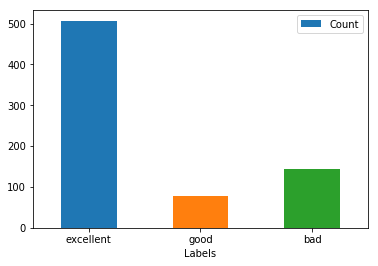

In [237]:
# Count of each class and its pictorial view
df_visual= pd.DataFrame(df_data.groupby('labels').size())
df_visual['Labels'] = ['excellent','good','bad']
df_visual['Count']= df_visual.iloc[:,0]

df_visual = df_visual.iloc[:,1:3]
df_visual.plot.bar(x='Labels', y='Count', rot=0)
df_visual



In [5]:
# Preprocessing the input data by normalizing it
from sklearn.preprocessing import MinMaxScaler
y_data = df_data['labels'].values
X_data = df_data.iloc[:,0:5].values
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)



In [6]:
# Splitting the data into test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.10, random_state=42)
    

# Classification Metrics

In [128]:
# Confusion matrix plotting
import seaborn as sns
import matplotlib.pyplot as plt 

def confusion_matrix_plot(cm):    

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['excellent', 'good','bad']); ax.yaxis.set_ticklabels(['excellent', 'good','bad']);
    

In [145]:
# Generate Classification Report
from __future__ import division
from sklearn.metrics import classification_report
def generate_report(y_test,y_pred):
    target_names = ['excellent', 'good', 'bad']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
# Generate individual accuracies
def individual_accuracies(conf_matrix):
    print("Accuracy of Excellent : ", (conf_matrix[0,0]/np.sum(conf_matrix[0,:])*100))
    print("Accuracy of Good : ", (conf_matrix[1,1]/np.sum(conf_matrix[1,:])*100))
    print("Accuracy of Bad : ", (conf_matrix[2,2]/np.sum(conf_matrix[2,:])*100))
    

# Miss-classification of bad Transformers
def miss_bad(conf_matrix):
    print conf_matrix[2,2],"/", np.sum(conf_matrix[2,:]), " transformers correctly classified as bad and ",np.sum(conf_matrix[2,0:2]),"/", np.sum(conf_matrix[2,:]),"bad transformers classified having no problem"
    print("Miss-classification of Bad Transformers : ", (np.sum(conf_matrix[2,0:2])/np.sum(conf_matrix[2,:])*100))
    
    
    

# Naive Bayes

('accuracy =', 82.1917808219178)
             precision    recall  f1-score   support

  excellent       0.79      1.00      0.88        44
       good       0.00      0.00      0.00         9
        bad       0.94      0.80      0.86        20

avg / total       0.73      0.82      0.77        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 80.0)
16 / 20  transformers correctly classified as bad and  4 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 20.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


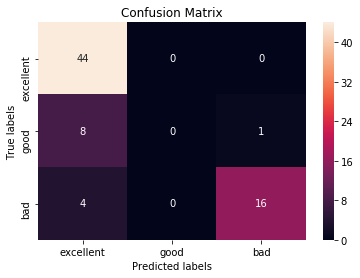

In [146]:
# Naive Bayes Algorithm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
y_pred = naive_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Support Vector Machine

('accuracy =', 86.3013698630137)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       0.00      0.00      0.00         9
        bad       0.79      0.95      0.86        20

avg / total       0.76      0.86      0.81        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 0.0)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


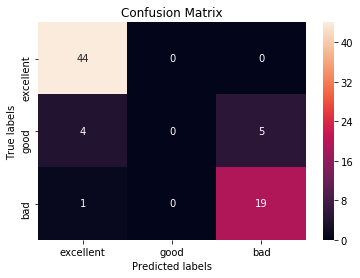

In [147]:
#Support Vector Machine
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='rbf')
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)



In [125]:
# Grid Search CV for SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1,2,5,8,10]}
support_vector = svm.SVC(gamma='auto')
grid_search_svm = GridSearchCV(support_vector, parameters, cv=5)
grid_search_svm.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 2, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
# Best parameters
grid_search_svm.best_params_

{'C': 10, 'kernel': 'linear'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


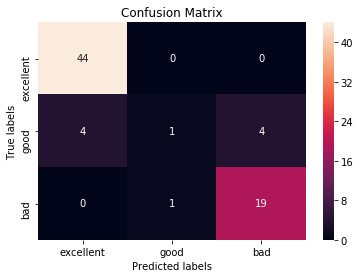

In [148]:
# Support Vector Machine with best parameter set
from sklearn import svm
support_vector = svm.SVC(gamma='auto',kernel='linear',C=10)
support_vector.fit(X_train,y_train)
y_pred = support_vector.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)

# Logistic Regression

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.90      1.00      0.95        44
       good       1.00      0.11      0.20         9
        bad       0.83      0.95      0.88        20

avg / total       0.89      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


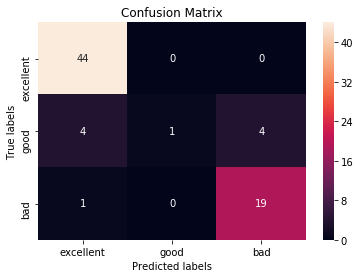

In [150]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


In [167]:
# Grid Search CV for Logistic Regression
from sklearn.model_selection import GridSearchCV
parameters = { 'C':(list(np.logspace(0, 4, 10))), 'solver' :('lbfgs','newton-cg','sag')}
logistic = LogisticRegression(random_state=0,multi_class='multinomial')
grid_search_logistic = GridSearchCV(logistic, parameters, cv=5)
grid_search_logistic.fit(X_train,y_train)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 2.7825594022071245, 7.742636826811269, 21.544346900318832, 59.94842503189409, 166.81005372000593, 464.15888336127773, 1291.5496650148827, 3593.813663804626, 10000.0], 'solver': ('lbfgs', 'newton-cg', 'sag')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
# Best parameters
grid_search_logistic.best_params_

{'C': 464.15888336127773, 'solver': 'lbfgs'}

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


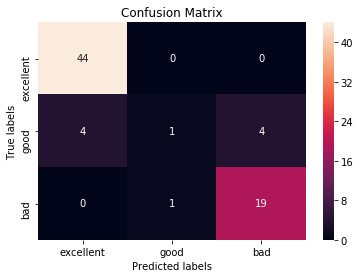

In [169]:
# Logistic Regression with best parameter set

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs',multi_class='multinomial',C=464.15888336127773)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Random Forest

('accuracy =', 87.67123287671232)
             precision    recall  f1-score   support

  excellent       0.92      1.00      0.96        44
       good       0.50      0.11      0.18         9
        bad       0.83      0.95      0.88        20

avg / total       0.84      0.88      0.84        73

('Accuracy of Excellent : ', 100.0)
('Accuracy of Good : ', 11.11111111111111)
('Accuracy of Bad : ', 95.0)
19 / 20  transformers correctly classified as bad and  1 / 20 bad transformers classified having no problem
('Miss-classification of Bad Transformers : ', 5.0)


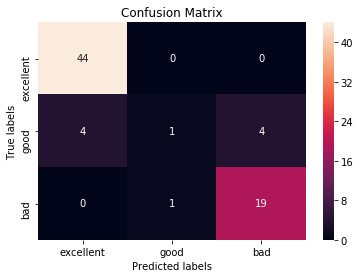

In [176]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
score = accuracy_score(y_test, y_pred, normalize=False)
accuracy = (100*score)/(len(y_test))
print("accuracy =", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_plot(conf_matrix)
generate_report(y_test,y_pred)
individual_accuracies(conf_matrix)
miss_bad(conf_matrix)


# Feature Selection
## 1.Univariate Selection

,Score
Feature,
Water,10.876739
Acidity,106.994034
BDV,0.693949
DF,54.147471
Color,228.579744


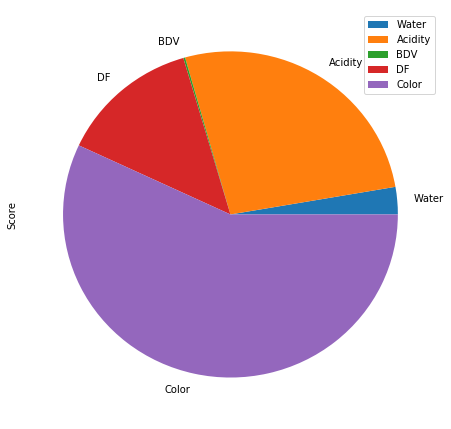

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(["Water","Acidity","BDV","DF","Color"])
features_score = pd.concat([df_features,df_scores,],axis=1)
features_score.columns=['Feature','Score']
features_score = features_score.set_index('Feature')
features_score.plot.pie(y='Score', figsize=(7.5, 7.5))
features_score

## 2. Feature Importance

,Features,Importance
0,Water,0.086261
1,Acidity,0.210766
2,BDV,0.113150
3,DF,0.245279
4,Color,0.344544


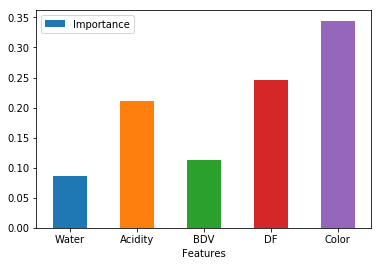

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

feature_imp = ExtraTreesClassifier()
feature_imp.fit(X_train,y_train)
features_df = pd.DataFrame({'Features': ["Water","Acidity","BDV","DF","Color"], 'Importance': feature_imp.feature_importances_})
features_df.plot.bar(x='Features', y='Importance', rot=0)
features_df

## 3. Correlation Matrix

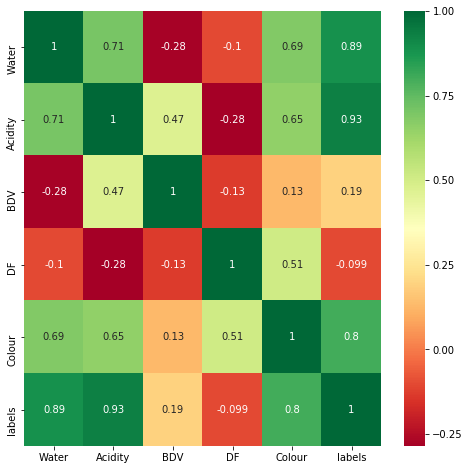

In [218]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_data.iloc[0:5].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_data.iloc[0:5][top_corr_features].corr(),annot=True,cmap="RdYlGn")

# T-SNE Visualization

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3)
X_tsne = X_embedded.fit_transform(X_data)

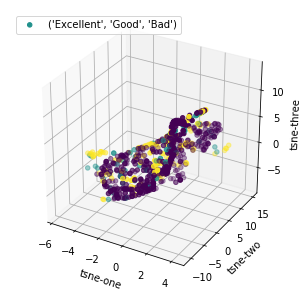

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter(
    xs=X_tsne[:,0], 
    ys=X_tsne[:,1], 
    zs=X_tsne[:,2], 
    c=y_data, label = ("Excellent","Good","Bad")
    #cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.legend(loc=2)
plt.show()
